In [1]:
import numpy_financial as npf
import numpy as np
import matplotlib.pyplot as plt

In [31]:
price = 120000  # cena nieruchomości w zł
yr_val_rate = 0.05  # przewidywana roczna zmiana wartości ceny nieruchomości
exp_val_per = 5  # przewidywany okres zmiany wartości ceny nieruchomości w latach
dep_rate = 0.12  # stopa oprocentowania lokaty
freq = 12  # częstość kapitalizacji lokaty w roku

m_dep_rate = dep_rate / freq  # konwersja rocznej stopy do miesięcznej
nper = exp_val_per * freq

In [29]:
target_price = np.around(npf.fv(0.05, exp_val_per, 0, -price))
target_price

153154.0

In [57]:
month_incr = np.linspace(price, target_price, nper)
month_incr

array([120000.        , 120561.93220339, 121123.86440678, 121685.79661017,
       122247.72881356, 122809.66101695, 123371.59322034, 123933.52542373,
       124495.45762712, 125057.38983051, 125619.3220339 , 126181.25423729,
       126743.18644068, 127305.11864407, 127867.05084746, 128428.98305085,
       128990.91525424, 129552.84745763, 130114.77966102, 130676.71186441,
       131238.6440678 , 131800.57627119, 132362.50847458, 132924.44067797,
       133486.37288136, 134048.30508475, 134610.23728814, 135172.16949153,
       135734.10169492, 136296.03389831, 136857.96610169, 137419.89830508,
       137981.83050847, 138543.76271186, 139105.69491525, 139667.62711864,
       140229.55932203, 140791.49152542, 141353.42372881, 141915.3559322 ,
       142477.28813559, 143039.22033898, 143601.15254237, 144163.08474576,
       144725.01694915, 145286.94915254, 145848.88135593, 146410.81355932,
       146972.74576271, 147534.6779661 , 148096.61016949, 148658.54237288,
       149220.47457627, 1

In [32]:
periods = np.arange(1, nper + 1, dtype=int)
periods

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [51]:
deposit_m_pay = npf.pmt(m_dep_rate, nper, 0, target_price)
deposit_sim = npf.fv(m_dep_rate, periods, deposit_m_pay, 0)

print(np.around(deposit_m_pay))

-1875.0


# Odpowiedzi

Wartość nieruchomości po 5 latach wyniesie 153 154 zł
Miesięczna składka na wybraną lokatę, aby uzyskać powyższą kwotę po 5 latach wynosi 1 875 zł

Text(0, 0.5, 'zł')

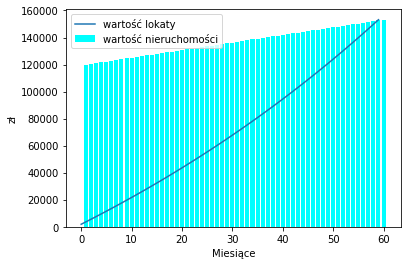

In [63]:
plt.bar(periods, month_incr, color='aqua', label='wartość nieruchomości')
plt.plot(deposit_sim, label='wartość lokaty')
plt.legend()
plt.xlabel('Miesiące')
plt.ylabel('zł')